[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jose\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jose\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                          review  \
0  I love this product! It’s absolutely amazing.   
1    Terrible experience 😡. Would not recommend!   
2              Average quality, could be better.   
3           Best purchase I’ve made this year ❤️   
4                  Not worth the price at all...   

                                cleaned_review  
0  i love this product it’s absolutely amazing  
1    terrible experience 😡 would not recommend  
2              average quality could be better  
3         best purchase i’ve made this year ❤️  
4                   not worth the price at all  
[('love', 1), ('product', 1), ('absolutely', 1), ('amazing', 1), ('terrible', 1), ('experience', 1), ('would', 1), ('recommend', 1), ('average', 1), ('quality', 1), ('could', 1), ('better', 1), ('best', 1), ('purchase', 1), ('made', 1), ('year', 1), ('worth', 1), ('price', 1)]


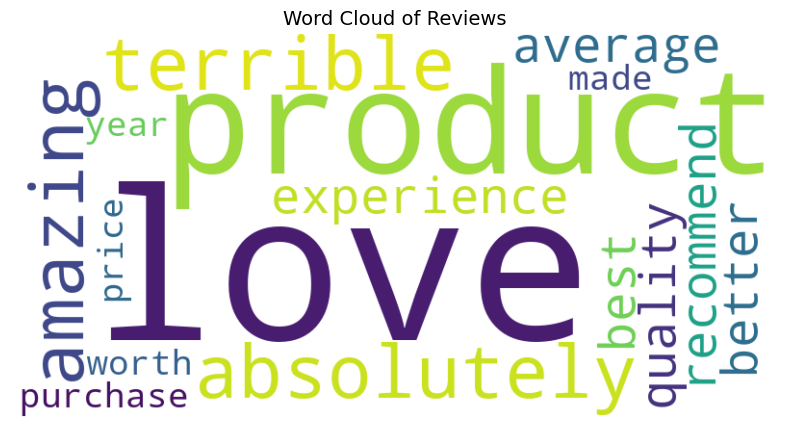

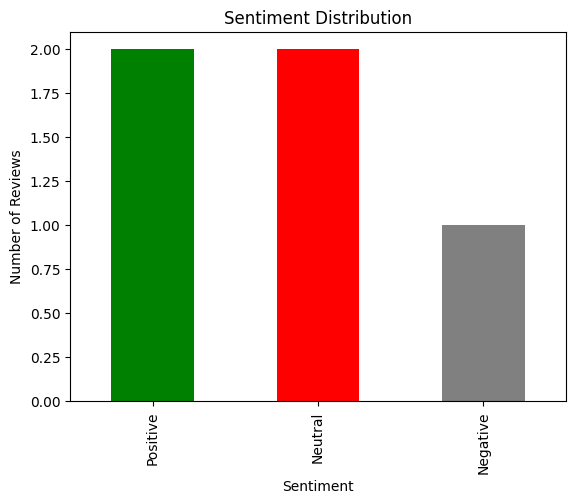

In [2]:
# text_analysis.ipynb

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

# Load cleaned text data
df = pd.read_csv('../assets/cleaned_reviews.csv')
print(df.head())

# Tokenize

df['tokens'] = df['review'].apply(word_tokenize)
df.head()

stop_words = set(stopwords.words('english'))

df['tokens'] = df['tokens'].apply(lambda tokens: [w.lower() for w in tokens if w.lower() not in stop_words and w.isalpha()])
df.head()

# Combine all tokens
all_words = [word for tokens in df['tokens'] for word in tokens]

# Count frequency
word_freq = Counter(all_words)
print(word_freq.most_common(20))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews', fontsize=14)
plt.show()


positive_words = ['good', 'great', 'amazing', 'excellent', 'love', 'best', 'fantastic']
negative_words = ['bad', 'poor', 'terrible', 'awful', 'hate', 'worst', 'disappointed']

def simple_sentiment(tokens):
    pos = sum(1 for w in tokens if w in positive_words)
    neg = sum(1 for w in tokens if w in negative_words)
    if pos > neg:
        return 'Positive'
    elif neg > pos:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['tokens'].apply(simple_sentiment)
df.head()

df['sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


df.to_csv('../assets/analyzed_reviews.csv', index=False)




In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')  
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jose\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Jose\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jose\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True